<a href="https://colab.research.google.com/github/mille055/AIPI590-XAI/blob/main/Assignments/07_aipi590_xai_explainable_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# AIPI 590 - XAI | Assignment 07

#Description: Explainable Deep Learning

This notebook is for exploring explainable deep AI methods (specifically TCAV) with a hypothesis-driven approach.

## Chad Miller

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mille055/AIPI590-XAI/blob/main/Assignments/07_aipi590_xai_explainabledeeplearning.ipynb)

In [1]:

import os

# Remove Colab default sample_data
!rm -r /content/sample_data

# Clone GitHub files to colab workspace
repo_name = "AIPI590-XAI"
git_path = 'https://github.com/mille055/AIPI590-XAI.git'
!git clone "{git_path}"

# Install dependencies from requirements.txt file
!pip install -r "{os.path.join(repo_name,'requirements.txt')}"


notebook_dir = 'Assignments'
path_to_notebook = os.path.join(repo_name,notebook_dir)


Cloning into 'AIPI590-XAI'...
remote: Enumerating objects: 432, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 432 (delta 157), reused 196 (delta 129), pack-reused 191 (from 1)
Receiving objects: 100% (432/432), 95.37 MiB | 30.49 MiB/s, done.
Resolving deltas: 100% (273/273), done.
  Cloning https://github.com/christophM/rulefit.git to /tmp/pip-install-dbj40l3a/rulefit_6c166ae66e8240c8b4dc669d9ce32216
  Running command git clone --filter=blob:none --quiet https://github.com/christophM/rulefit.git /tmp/pip-install-dbj40l3a/rulefit_6c166ae66e8240c8b4dc669d9ce32216
  Resolved https://github.com/christophM/rulefit.git to commit 472b8574b4eb9e565caf1e05ed580998fe2c9a8e
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/MaximeJumelle/ALEPython.git to /tmp/pip-install-dbj40l3a/alepython_729cd297ef42443f8906711505856122
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumel

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!git clone -b colabversion 'https://github.com/mille055/stanford_project.git'
!git clone 'https://github.com/mille055/AIPI590-XAI.git'
!pip install -r /content/AIPI590-XAI/requirements.txt

Cloning into 'stanford_project'...
remote: Enumerating objects: 2922, done.
remote: Counting objects: 100% (677/677), done.
remote: Compressing objects: 100% (261/261), done.
remote: Total 2922 (delta 477), reused 601 (delta 414), pack-reused 2245 (from 1)
Receiving objects: 100% (2922/2922), 384.51 MiB | 41.19 MiB/s, done.
Resolving deltas: 100% (2077/2077), done.
fatal: destination path 'AIPI590-XAI' already exists and is not an empty directory.
  Cloning https://github.com/christophM/rulefit.git to /tmp/pip-install-iklkh3g_/rulefit_ee8d7a4f260141298b538711aa6ce2c3
  Running command git clone --filter=blob:none --quiet https://github.com/christophM/rulefit.git /tmp/pip-install-iklkh3g_/rulefit_ee8d7a4f260141298b538711aa6ce2c3
  Resolved https://github.com/christophM/rulefit.git to commit 472b8574b4eb9e565caf1e05ed580998fe2c9a8e
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/MaximeJumelle/ALEPython.git to /tmp/pip-install-iklkh3g_/alepython_903cc8cfad4a4e8989849

In [9]:
## Standard libraries
import json
import math
import time
import numpy as np
import tabulate
import urllib.request
import zipfile
import pandas as pd
import sys
from google.colab import drive
import tensorflow as tf

## Imports for data exploration
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## Imports for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report


## Imports for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Imports for imodels assignment
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, export_text

## Imports for XGBoost model
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

## Imports for GAM
from pygam import LogisticGAM, LinearGAM, GammaGAM, s

## Imports for explainable ai
import alibi
from alibi.explainers import AnchorImage
from alibi.explainers import ALE
from skimage.transform import resize
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries
import pdpbox
import warnings
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from alepython import ale_plot

## Imports for plotting
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms, datasets
import torchvision.transforms.functional as TF
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from torchvision.datasets import ImageNet


## local imports ###
from config import file_dict, feats, feats_to_keep, column_lists, RF_parameters, classes, model_paths
from config import abd_label_dict, val_list, train_val_split_percent, random_seed, data_transforms
from utils import *

from cnn.cnn_dataset import ImgDataset
from cnn.cnn_inference import image_to_tensor, pixel_inference, test_pix_model, load_pixel_model, visualize_results
from cnn.cnn_model import *
from cnn.cnn_training import *
from cnn.cnn_data_loaders import get_data_loaders, data_transforms, data_transforms2, data_transforms3, data_transforms4

from model_container import ModelContainer


In [10]:
# get the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Download Datasets and EDA

In [11]:
# get the dataset and model
sys.path.append('/content/stanford_project/app/scripts/')
train_datafile = '/content/stanford_project/app/data/trainfiles.csv'
val_datafile = '/content/stanford_project/app/data/valfiles.csv'
test_datafile = '/content/stanford_project/app/data/testfiles.csv'

drive.mount('/content/gdrive')



train_df = pd.read_pickle('/content/gdrive/MyDrive/train_df.pkl')
val_df = pd.read_pickle('/content/gdrive/MyDrive/val_df.pkl')
test_df = pd.read_pickle('/content/gdrive/MyDrive/test_df.pkl')
val_ran_df = pd.read_pickle('/content/gdrive/MyDrive/val_ran_df.pkl')


batch_size = 16
train_loader, val_loader, test_loader, dataset_sizes = get_data_loaders(train_df, val_df, test_df, batch_size)
train_loader2, val_loader2, test_loader2, dataset_sizes2 = get_data_loaders(train_df, val_df, test_df, batch_size, data_transforms=data_transforms2)
train_loader3, val_loader3, test_loader3, dataset_sizes3 = get_data_loaders(train_df, val_df, test_df, batch_size, data_transforms=data_transforms3)
train_loader4, val_loader4, test_loader4, dataset_sizes4 = get_data_loaders(train_df, val_df, test_df, batch_size, data_transforms=data_transforms4)

dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}
dataloaders2 = {'train': train_loader2, 'val': val_loader2, 'test': test_loader2}
dataloaders3 = {'train': train_loader3, 'val': val_loader3, 'test': test_loader3}
dataloaders4 = {'train': train_loader4, 'val': val_loader4, 'test': test_loader4}

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Some things about the dataset:

In [12]:
# list of the classes

cls_list = []
for cls in classes:
    cls_list.append(abd_label_dict[str(cls)]['short'])
print(cls_list)

['adc', 'arterial', 'dynamic_late', 't2', 'dwi', 't2', 'dwi', 'dixon_fat', 'hepatobiliary', 'hepatobiliary', 'in_phase', 'in_phase', 'dynamic_equilibrium', 'loc', 'mrcp', 'opposed_phase', 'opposed_phase', 'portal_venous', 't1_fat_sat']


In [13]:
# distribution of classes in the test dataset
t_df = test_df.copy()
t_df['text_label'] = t_df['label'].apply(lambda x: abd_label_dict[str(x)]['short'])
t_df['text_label'].value_counts()

,count
text_label,
t2,64
arterial,61
t1_fat_sat,47
dwi,43
dixon_fat,29
mrcp,28
in_phase,23
opposed_phase,23
dynamic_equilibrium,22


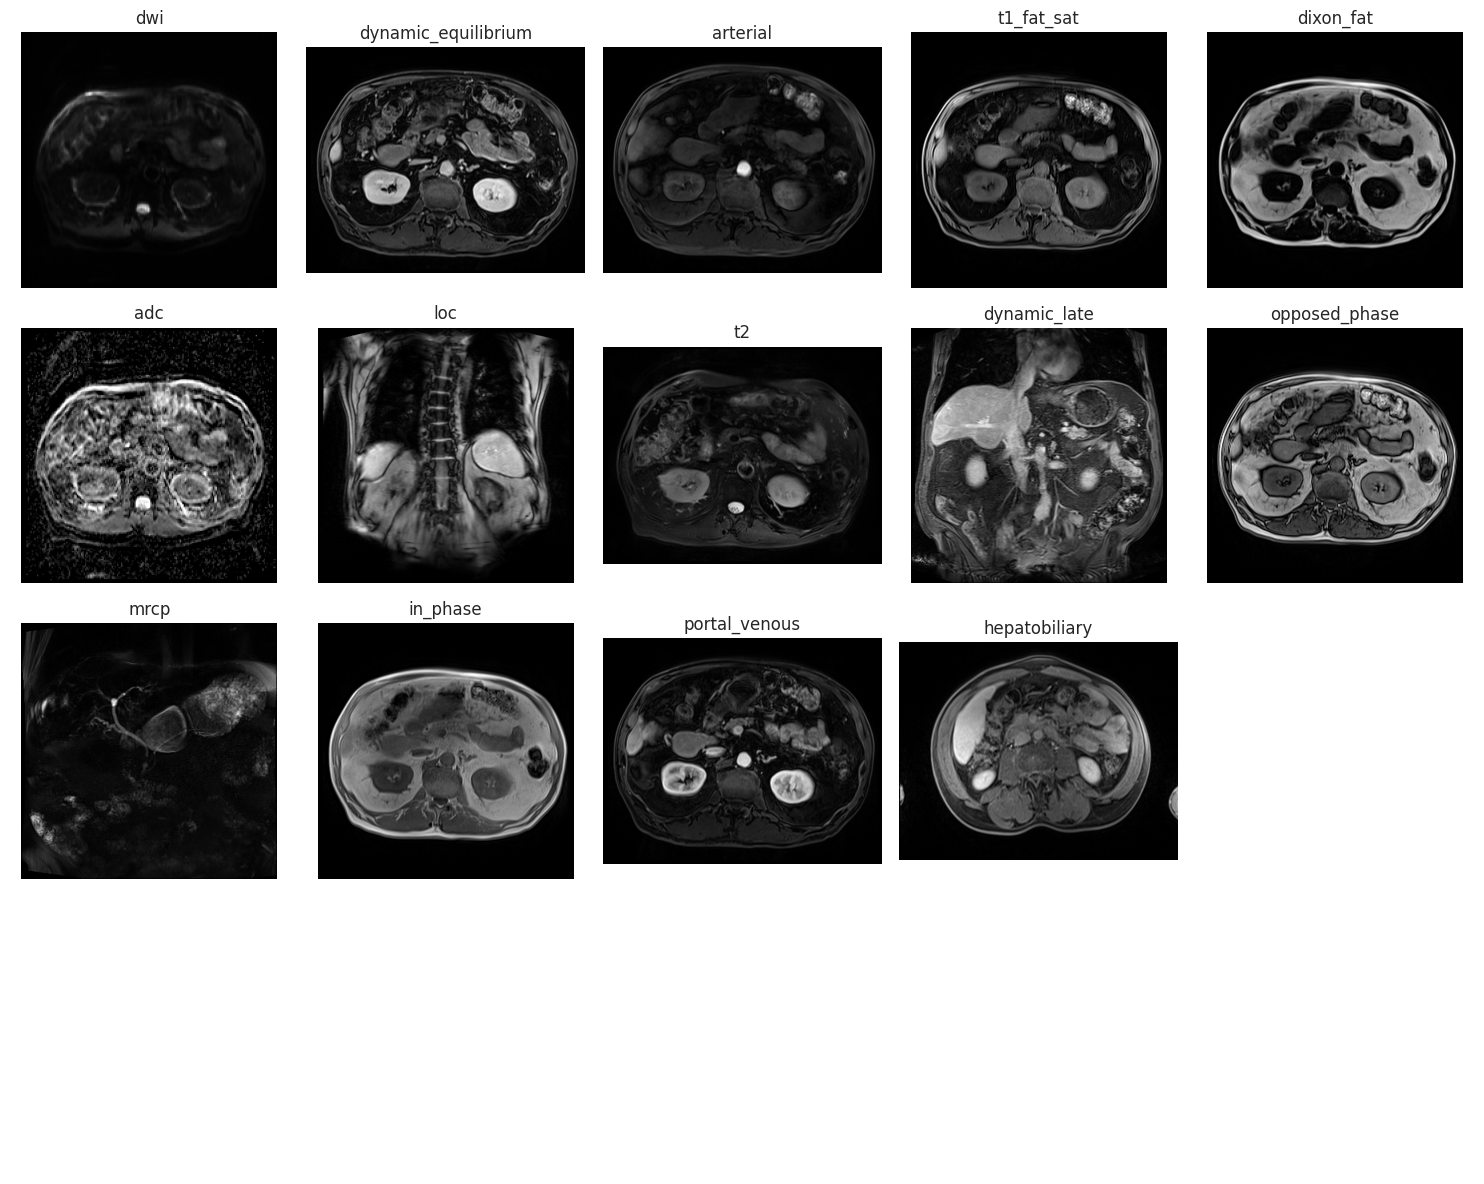

In [14]:
# Get one example of each type of image
each_type = t_df.groupby('text_label').head(1)

# Set up the number of rows and columns for the grid and create a figure
n_cols = 5
n_rows = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through each image and its corresponding axis
for idx, (ax, (_, row)) in enumerate(zip(axes, each_type.iterrows())):
    image_path = row['fname']
    label = row['label']
    named_label = abd_label_dict[str(label)]['short']

    # Load the DICOM image
    ds = pydicom.dcmread(image_path)
    image = ds.pixel_array

    # Display the image on the corresponding axis
    ax.imshow(image, cmap='gray')
    ax.set_title(named_label)
    ax.axis('off')  # Turn off the axis labels/ticks

# Hide any remaining empty subplots
for ax in axes[idx + 1:]:
    ax.axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

Hypothesis

Based on the images above, one hypothesis is




## DenseNet model for image classification

In [15]:
# Load the saved model
model = CustomDenseNet(num_classes=len(classes))
model.load_state_dict(torch.load('/content/gdrive/MyDrive/best_model_cnn_0930.pth'))
model.to(device)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 139MB/s]
<ipython-input-15-87a04d87b207>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly.

CustomDenseNet(
  (densenet): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, mome

In [16]:
def display_and_save_results2(y_pred, y_true, classes=classes, fn='', saveflag = True):


    classes_raw_list = np.unique(np.concatenate((y_true, y_pred)))
    print(classes_raw_list)
    classes_list = [classes[x] for x in classes_raw_list]
    print(classes_list)
    y_true = [classes[x] for x in y_true]
    y_pred = [classes[x] for x in y_pred]
    # Generate a confusion matrix based on the true labels and predicted labels
    cm = confusion_matrix(y_true = y_true, y_pred = y_pred, labels=classes_list)

    #mask = np.all(cm == 0, axis=1)

    class_text_labels = np.array([abd_label_dict[str(x)]['short'] for x in classes_list])
    #class_text_labels = class_text_labels[~mask]

     # Generate a classification report based on the true labels and predicted labels
    print(classification_report(y_true, y_pred))


    #cm = cm[~mask]
    # Create a ConfusionMatrixDisplay object with the correct labels
    cm_display = ConfusionMatrixDisplay(cm, display_labels=class_text_labels).plot(xticks_rotation = 'vertical', cmap='Blues')
    plt.figure(figsize=(25, 25))
    plt.tight_layout()
    #ConfusionMatrixDisplay(cm, display_labels=class_text_labels).plot(xticks_rotation = 'vertical', cmap='Blues')
    if saveflag:
        plt.savefig("/content/FigCM_"+fn+datetime.today().strftime('%Y%m%d')+".tif",dpi=300, bbox_inches = 'tight')

    return cm

## Saliency Maps and Statistical Testing

In [17]:
def compute_saliency_map_pytorch(model, input_image, target_class_idx):
    """ Compute the saliency map for an input image using PyTorch. """
    input_image = input_image.to(next(model.parameters()).device)
    input_image = torch.tensor(input_image, requires_grad=True, dtype=torch.float32)

    # Forward pass to compute predictions
    output = model(input_image)
    loss = output[0, target_class_idx]

    # Backward pass to compute gradients of the target class score w.r.t. input image
    model.zero_grad()
    loss.backward()

    # Take the absolute value of the gradients
    saliency_map = input_image.grad.data.abs().squeeze().max(dim=0)[0].cpu().numpy()
    return saliency_map

In [79]:
def get_sample_image(df, location):
  """ Get a sample image from the dataframe. """

  example = df.iloc[location]
  image_path = example['fname']
  label = example['label']
  named_label = abd_label_dict[str(label)]['short']

  # Load the DICOM image
  ds = pydicom.dcmread(image_path)
  image = ds.pixel_array

  # create transformed image for the model
  transformed_image = image.astype(np.uint8)
  transformed_image = data_transforms2['train'](transformed_image)
  transformed_image = transformed_image.unsqueeze(0)

  # resize image to match that of transformed_image
  image = resize(image, (229, 229))

  return image, transformed_image, label, named_label

In [80]:
image, transformed_image, label, named_label = get_sample_image(test_df, 10)

In [81]:

saliency_map = compute_saliency_map_pytorch(model, transformed_image, label)

<ipython-input-17-7296a6fed169>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_image = torch.tensor(input_image, requires_grad=True, dtype=torch.float32)


In [84]:
def plot_saliency(image, labelname, saliency_map):
    """ Plot original image and its saliency map side-by-side using PyTorch. """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))


    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(f"Original Image of class {labelname} ")
    axes[0].axis('off')

    # # Plot the saliency map
    axes[1].imshow(saliency_map, cmap='hot')
    axes[1].set_title("Saliency Map")
    axes[1].axis('off')

    plt.show()

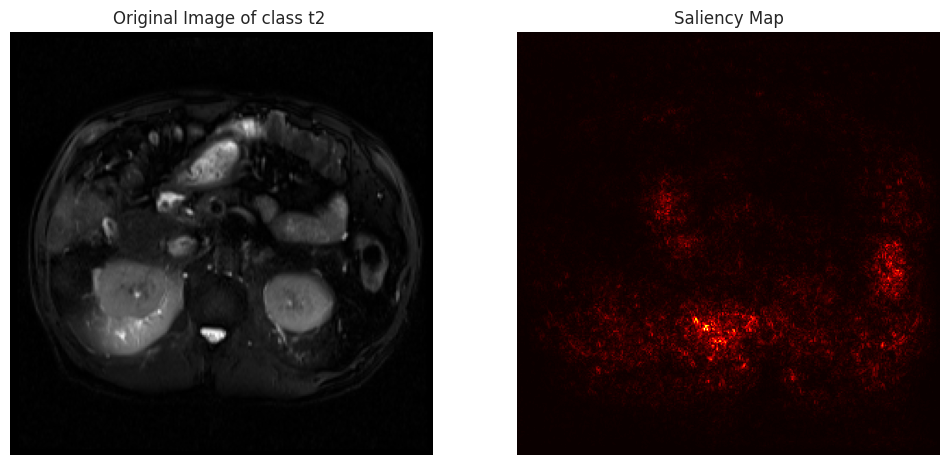

In [85]:


plot_saliency(image, named_label, saliency_map)

<ipython-input-17-7296a6fed169>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_image = torch.tensor(input_image, requires_grad=True, dtype=torch.float32)


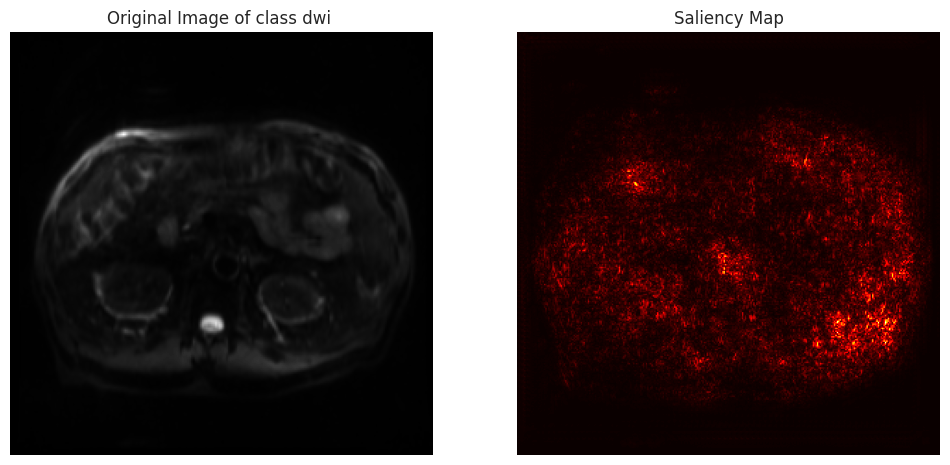

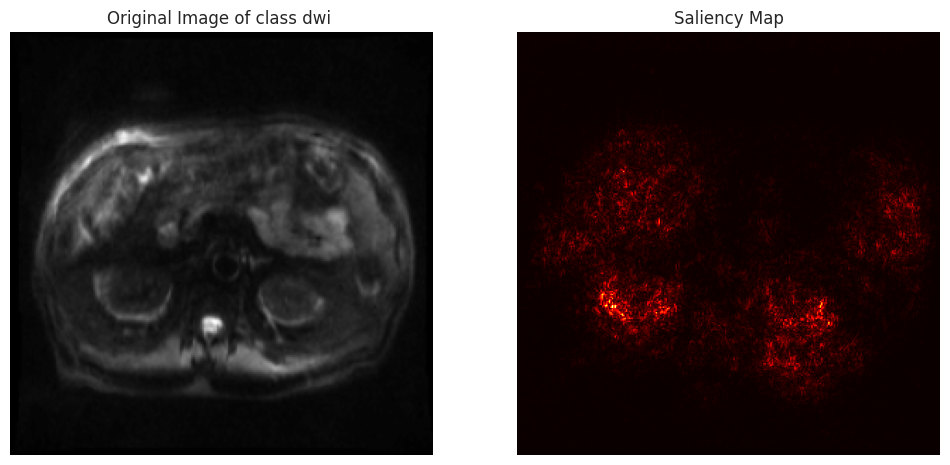

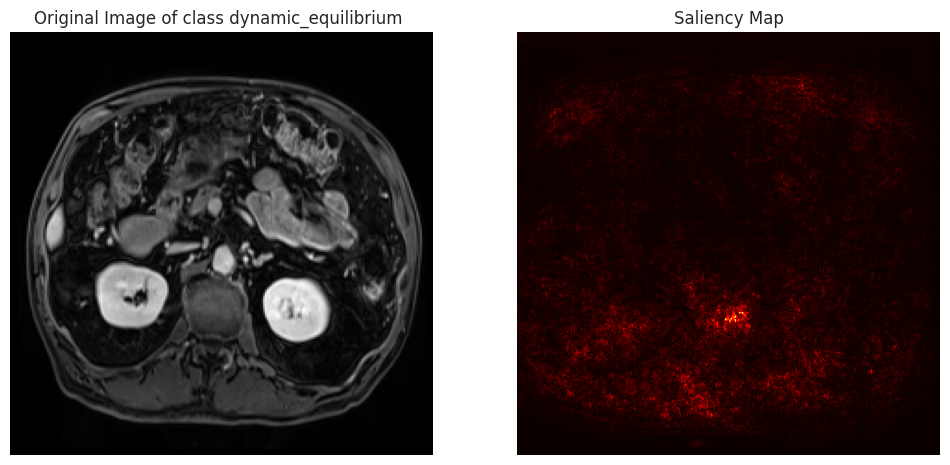

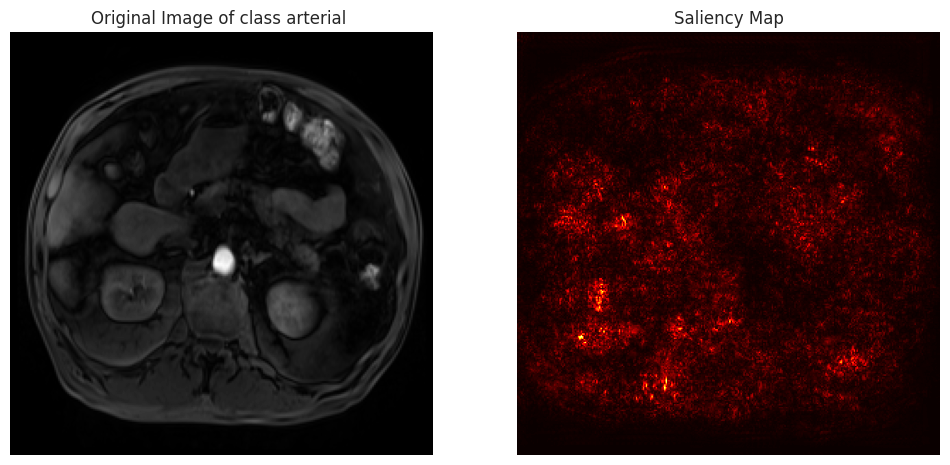

IndexError: index 25 is out of bounds for dimension 1 with size 19

In [86]:
for i in range(test_df.shape[0]):
  image, transformed_image, label, named_label = get_sample_image(test_df, i)
  saliency_map = compute_saliency_map_pytorch(model, transformed_image, label)
  plot_saliency(image, named_label, saliency_map)